<h1>Flood detection with flooded regions</h1>
<a href="https://docs.google.com/spreadsheets/d/1RODj4LmFmEPsnqpVyjow8-0KfDw94pJEZzKBhJkgzts/edit?usp=sharing">Dataset Link</a>

<h3><b>Location list</b><br><br>
-bozkurt<br>
-liege<br>
-kyushu<br>
-skopje<br>
-venice <br>
</h3>

In [1]:
#Python modules import
import os
from PIL import Image
import cv2

<h3>Resize images to same size</h3>

In [2]:
#resize images
def resize(name):
    
    img = cv2.imread(name)
    Nimg = cv2.resize(img,(1250,840))   # image resizing
    cv2.imwrite("resized/"+name, Nimg)
    img = cv2.imread("resized/"+name)
#     print("Resized: ",name)
#     print("New size: ",img.shape)

<h3>Create Flood Mask</h3>

In [3]:
#Create flood Mask
def flood_mask(file,file1,name):
    #Lists
    rgb=[]
    rgb1=[]
    mask = []
    # Read Image
    img = Image.open(file)
    img1 = Image.open(file1)

    #Convert image to RGB format
    img.convert('RGB')
    img1.convert('RGB')
    #Find number of pixels
    width, height = img.size
    total_pixel=width*height

    #set threshold and colour RGB values
    diff = 50
    colour = (0,0,255)

    #Fetch colour of all pixels
    count = 0
    for x in range(0, width):
        for y in range(0, height):
            r, g, b = img.getpixel((x,y))
            r1, g1, b1 = img1.getpixel((x,y))
            rgb.append((r,g,b))
            rgb1.append((r1,g1,b1))
            if r in range(r1-diff,r1+diff):
                if g in range(g1-diff,g1+diff):
                    if b in range(b1-diff,b1+diff):
                        mask.insert(count,(r,g,b))
                    else:mask.insert(count,(0,0,0))
                else:mask.insert(count,(0,0,0))
            else:mask.insert(count,(0,0,0))
            count += 1

#     print("Total pixels: ",len(rgb),"\nMask pixel: ",len(mask))
    im = Image.new("RGB",(width,height))
    im.putdata(mask)
    im.save(name+'-mask.png')

<h3>Detect Flood from the mask</h3>

In [4]:
#Flood detection
def detect(filename):
    #Lists
    rgb=[]
    flood_pixel=[]

    # Read Image
    img = Image.open(filename)

    #Convert image to RGB format
    img.convert('RGB')

    #Find number of pixels
    width, height = img.size
    total_pixel=width*height

    #Fetch colour of all pixels
    for x in range(0, width):
        for y in range(0, height):
            r, g, b = img.getpixel((x,y))
            rgb.append((r,g,b))

    #set threshold and colour RGB values
    diff = 50
    colour = (0,0,255)

    #Find pixels in range of colour+-threshold
    for i in range(len(rgb)):
        if rgb[i][0] in range(colour[0]-diff,colour[0]+diff):
            r = rgb[i][0]
            if rgb[i][1] in range(colour[1]-diff,colour[1]+diff):
                g = rgb[i][1]
                if rgb[i][2] in range(colour[2]-diff,colour[2]+diff):
                    b = rgb[i][2]
                    flood_pixel.append((r,g,b))

#     #Find percent of water present and if it is flooded or not
#     water_percent = len(flood_pixel)/total_pixel*100
#     print("Percentage of water: ",water_percent,'%')
#     if water_percent>water_threshold:
#         return 1
#     else:
#         return 0
#     print("Flooded Pixels:",len(flood_pixel),"\nNon Flood Pixels:",len(rgb)-len(flood_pixel))
    print("End of",filename,"detection part")
    return (len(rgb),len(flood_pixel))

<h3>Create Confusion Matrix</h3>

In [5]:
def create_confusion(actual,predicted,title="Test"):
    #Confusion matrix generation
    import matplotlib.pyplot as plt
    import numpy
    from sklearn import metrics

    confusion_matrix = metrics.confusion_matrix(actual, predicted,normalize="all")

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non Flood', 'Flood'])

    cm_display.plot()
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [6]:
#Main code
location = ['bozkurt','kyushu','liege','skopje','venice']
for loc in location:
    try:
        #resize
        resize(loc+"-flood.png")
        resize(loc+"-before.png")
        #flood mask
        im = "resized/"+loc+"-flood.png"
        im1 = "resized/"+loc+"-before.png"
        flood_mask(im,im1,loc)
    except Exception as e:
        print("Exception: ",e)

<h3>Analyze accuracy from snap generated mask from backscatter</h3>

End of bozkurt-mask.png detection part
End of resized/bozkurt-snap.png detection part
End of kyushu-mask.png detection part
End of resized/kyushu-snap.png detection part
End of liege-mask.png detection part
End of resized/liege-snap.png detection part
End of skopje-mask.png detection part
End of resized/skopje-snap.png detection part
End of venice-mask.png detection part
End of resized/venice-snap.png detection part


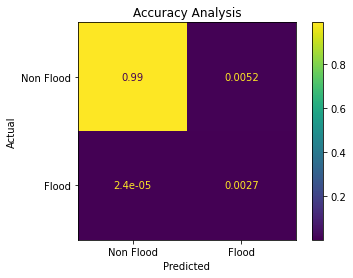

In [7]:
true = []
pred = []
location = ['bozkurt','kyushu','liege','skopje','venice']
for l in location:
    nonf,f=detect(l+"-mask.png")
    nonf1,f1=detect("resized/"+l+"-snap.png")

    ratio = f/(nonf+f)
    no_true = 1050000*ratio
    ratio1 = f1/(nonf1+f1)
    no_true1 = 1050000*ratio1
#     print(ratio,ratio1)
    for i in range(1050000):
        if i<no_true:
            pred.append(True)
        else:
            pred.append(False)
    for i in range(1050000):
        if i<no_true1:
            true.append(True)
        else:
            true.append(False)
create_confusion(true,pred,"Accuracy Analysis")